In [1047]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [889]:
db = dm.read_db(base='prices_global.pkl', add=['prices_kr.pkl'])
db_kr = dm.read_db(base='prices_kr.pkl', add=['prices_global.pkl'])

# Global multiasset model

In [1048]:
gmm = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_global_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], #[1,0,0,0,0,0,1,0,0,0.25*4,0.25*6,0.25*12], #
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_HY', #'ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


8.924200057983398


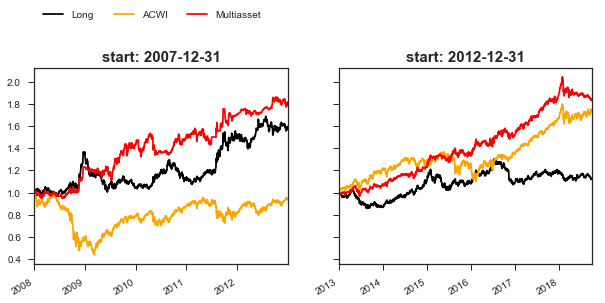

In [1051]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

gmm.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

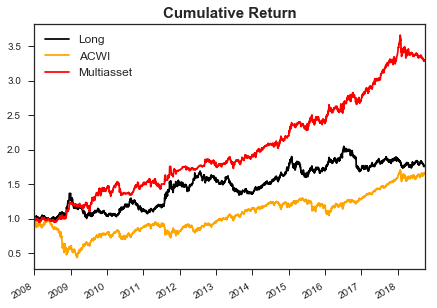

In [1052]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

gmm.plot_cum(strats, names=names, color=color, logy=False)

In [1053]:
rt = gmm.cum.DualMomentum.resample('M').ffill().pct_change()
rt[rt<-0.05]

2009-04-30   -0.058353
2010-05-31   -0.084360
2018-02-28   -0.051543
Name: DualMomentum, dtype: float64

In [1054]:
gmm.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BaseMetal,0.78,2708,-2.30,24.51,-0.09,-59.81,-3.01,18.31,-0.16,0.57,52.99,53.91,0.88,17.53
BND_US_Bankloan,1.55,2708,4.15,4.90,0.85,-32.43,3.52,3.29,1.62,0.07,17.08,64.06,1.01,77.23
Agriculture,0.52,2708,-5.82,18.06,-0.32,-60.05,-5.57,11.86,-0.47,0.34,69.34,42.97,1.07,63.48
USD_UP,1.07,2708,0.66,8.66,0.08,-22.19,-0.41,8.26,-0.05,-0.15,52.38,50.00,1.10,2.02
DualMomentum,3.30,2708,11.66,12.31,0.95,-12.79,12.85,11.57,1.06,0.10,0.37,58.59,1.72,97.88


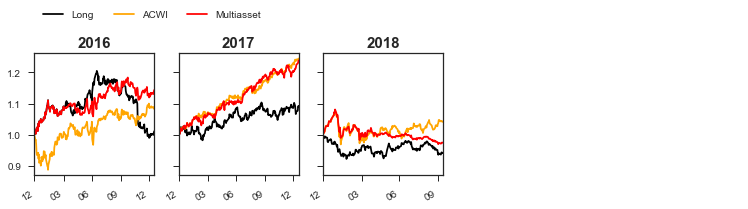

In [1055]:
gmm.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

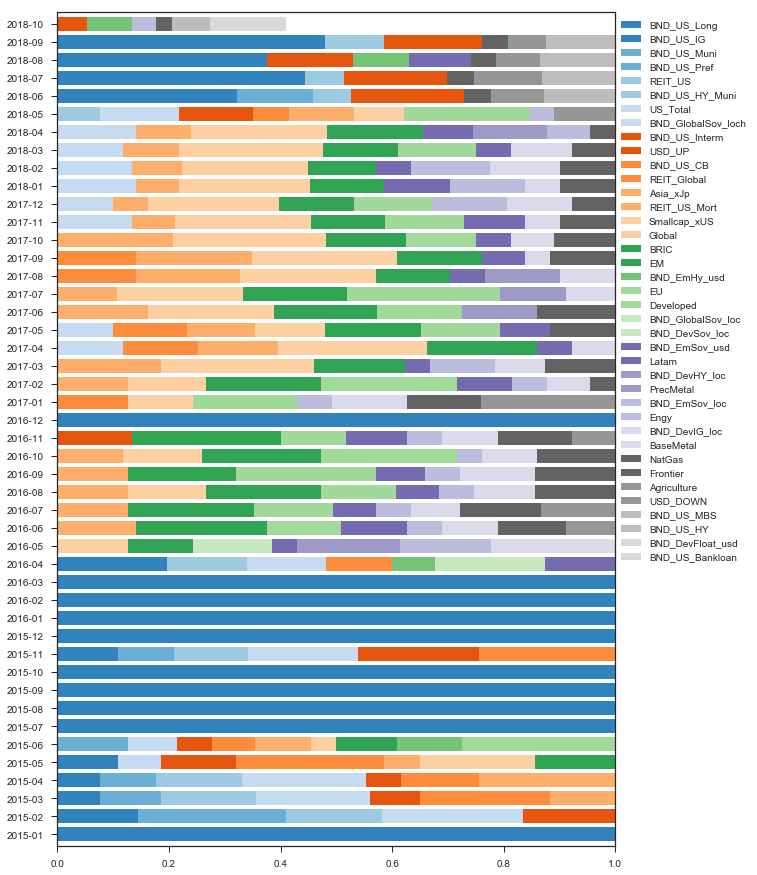

In [1056]:
gmm.plot_weight([2015, 2018])

# Global equity allocation model

In [189]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_global_eq, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


8.735999822616577


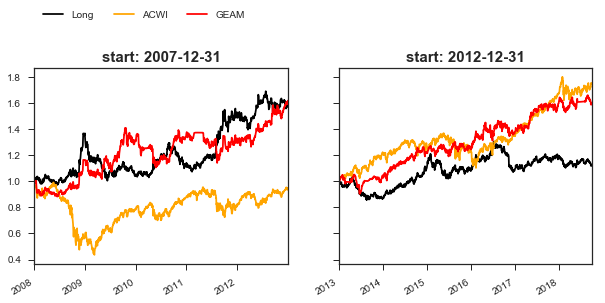

In [191]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

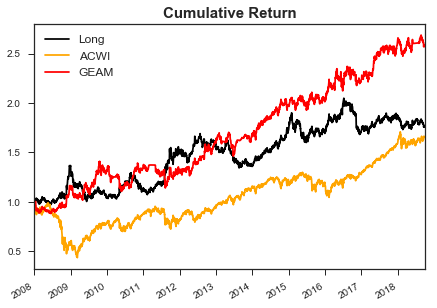

In [192]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [190]:
geam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Brazil,0.58,2708,-4.87,38.56,-0.13,-77.25,-5.21,32.19,-0.18,1.42,56.16,49.22,1.06,25.20
Japan,1.33,2708,2.66,22.15,0.12,-49.67,6.71,18.13,0.38,0.86,32.41,58.59,0.87,-22.08
Egypt,0.32,2708,-10.07,30.17,-0.33,-78.05,-7.36,29.73,-0.26,0.36,61.24,49.22,0.93,15.42
SouthAfrica,1.15,2708,1.30,36.48,0.04,-61.22,5.79,28.93,0.20,1.41,38.27,54.69,0.97,26.38
DualMomentum,2.58,2708,9.17,14.60,0.63,-21.52,10.44,13.95,0.79,0.13,10.41,57.81,1.30,96.10


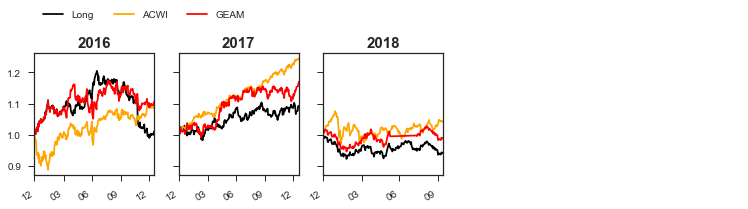

In [193]:
geam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

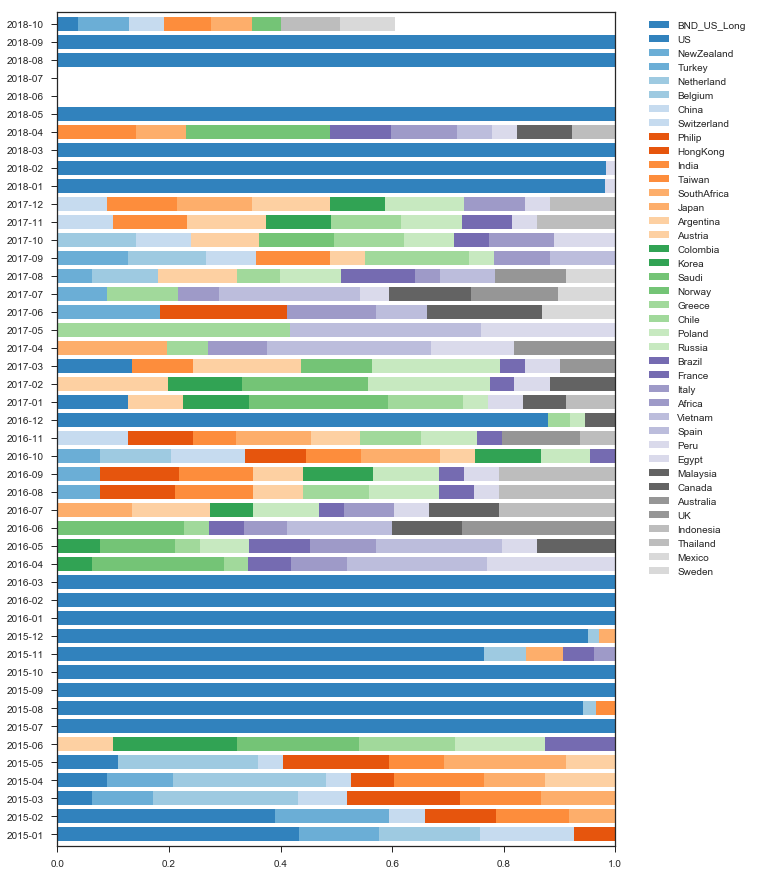

In [194]:
geam.plot_weight([2015, 2018])

# Global sector allocation model

In [197]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05,
    profitake_sigma=3, 
    rentry_sigma=2, 
)


9.967696905136108


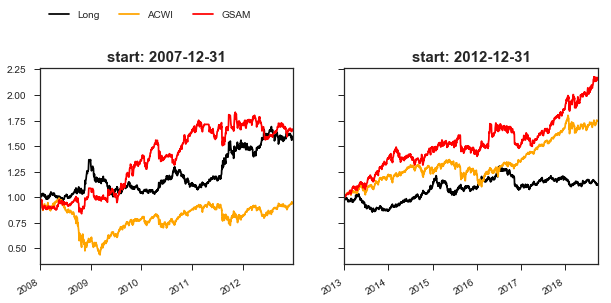

In [199]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

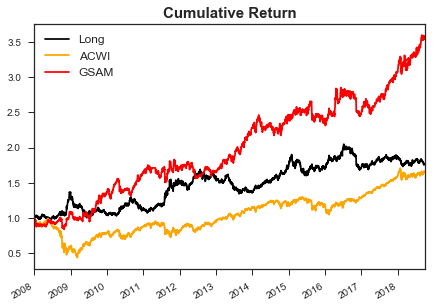

In [200]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False)

In [198]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
ConsumerGoods,2.36,2708,8.27,15.74,0.53,-40.81,12.34,12.53,1.03,0.64,11.10,60.94,1.12,80.24
MLP,1.68,2708,4.90,23.30,0.21,-53.06,7.95,15.10,0.61,0.63,32.13,58.59,0.97,48.71
Lithium,1.26,2353,2.49,23.54,0.11,-61.91,-1.87,20.69,-0.08,1.15,52.99,52.25,1.11,-3.38
Bank,1.31,2708,2.49,37.95,0.07,-79.49,10.36,22.18,0.53,1.30,31.68,57.03,0.92,-57.12
DualMomentum,3.59,2708,12.52,16.15,0.78,-16.62,11.95,14.62,0.75,0.31,12.48,60.94,1.25,94.23


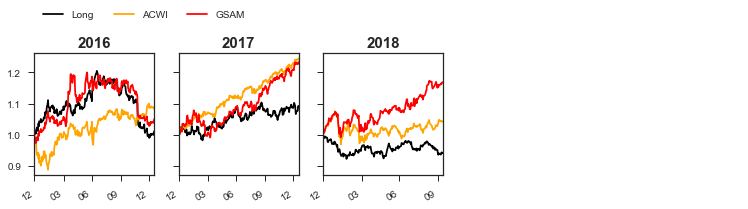

In [201]:
gsam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

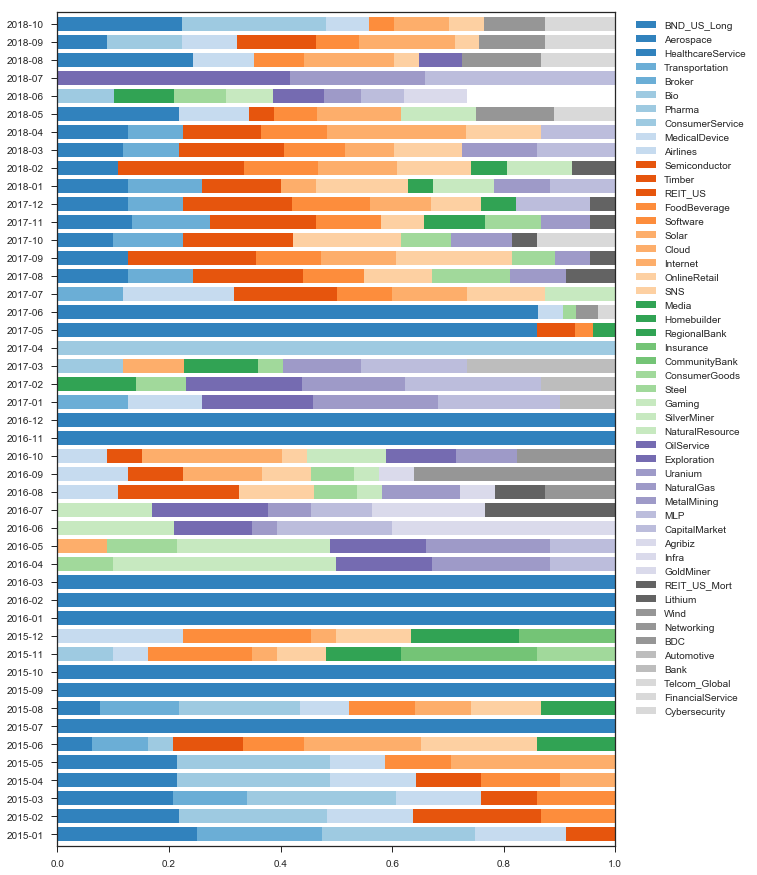

In [202]:
gsam.plot_weight([2015, 2018])

# Global bond allocation model

In [128]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [205]:
gbam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_fi, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_thres=0.1, 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(60,250), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='BND_US_Interm', #'BND_GlobalSov_loch', #'BND_US_AGG', 
    supporter='ACWI', 
    cash_equiv='BND_US_Long', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=1.03, 
    profitake_sigma=30,
    rentry_sigma=20, 
)


6.239560127258301


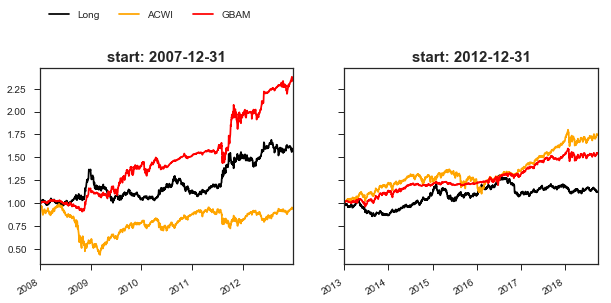

In [207]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GBAM']
color = ['k', 'orange', 'r']

gbam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

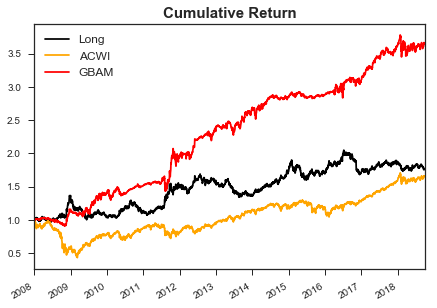

In [208]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GBAM']
color = ['k', 'orange', 'r']

gbam.plot_cum(strats, names=names, color=color, logy=False)

In [206]:
gbam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_DevSov_loc,1.20,2708,1.68,8.98,0.19,-15.77,1.51,8.65,0.17,0.07,41.28,56.25,0.94,-17.05
BND_US_Bankloan,1.55,2708,4.15,4.90,0.85,-32.43,3.52,3.29,1.62,0.07,17.08,64.06,1.01,77.23
BND_EmSov_usd,1.79,2708,5.52,10.66,0.52,-34.70,7.15,7.20,0.99,0.14,24.60,66.41,0.84,88.38
BND_EmSov_loc,1.20,2708,1.71,10.99,0.16,-32.01,3.83,10.19,0.34,0.28,42.78,60.94,0.76,-2.42
DualMomentum,3.65,2708,12.69,12.71,1.00,-13.35,11.71,10.51,1.08,0.25,1.83,65.62,1.47,94.16


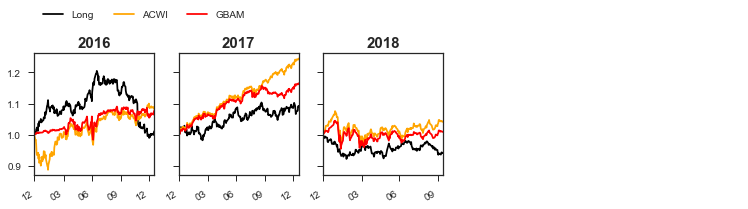

In [209]:
gbam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

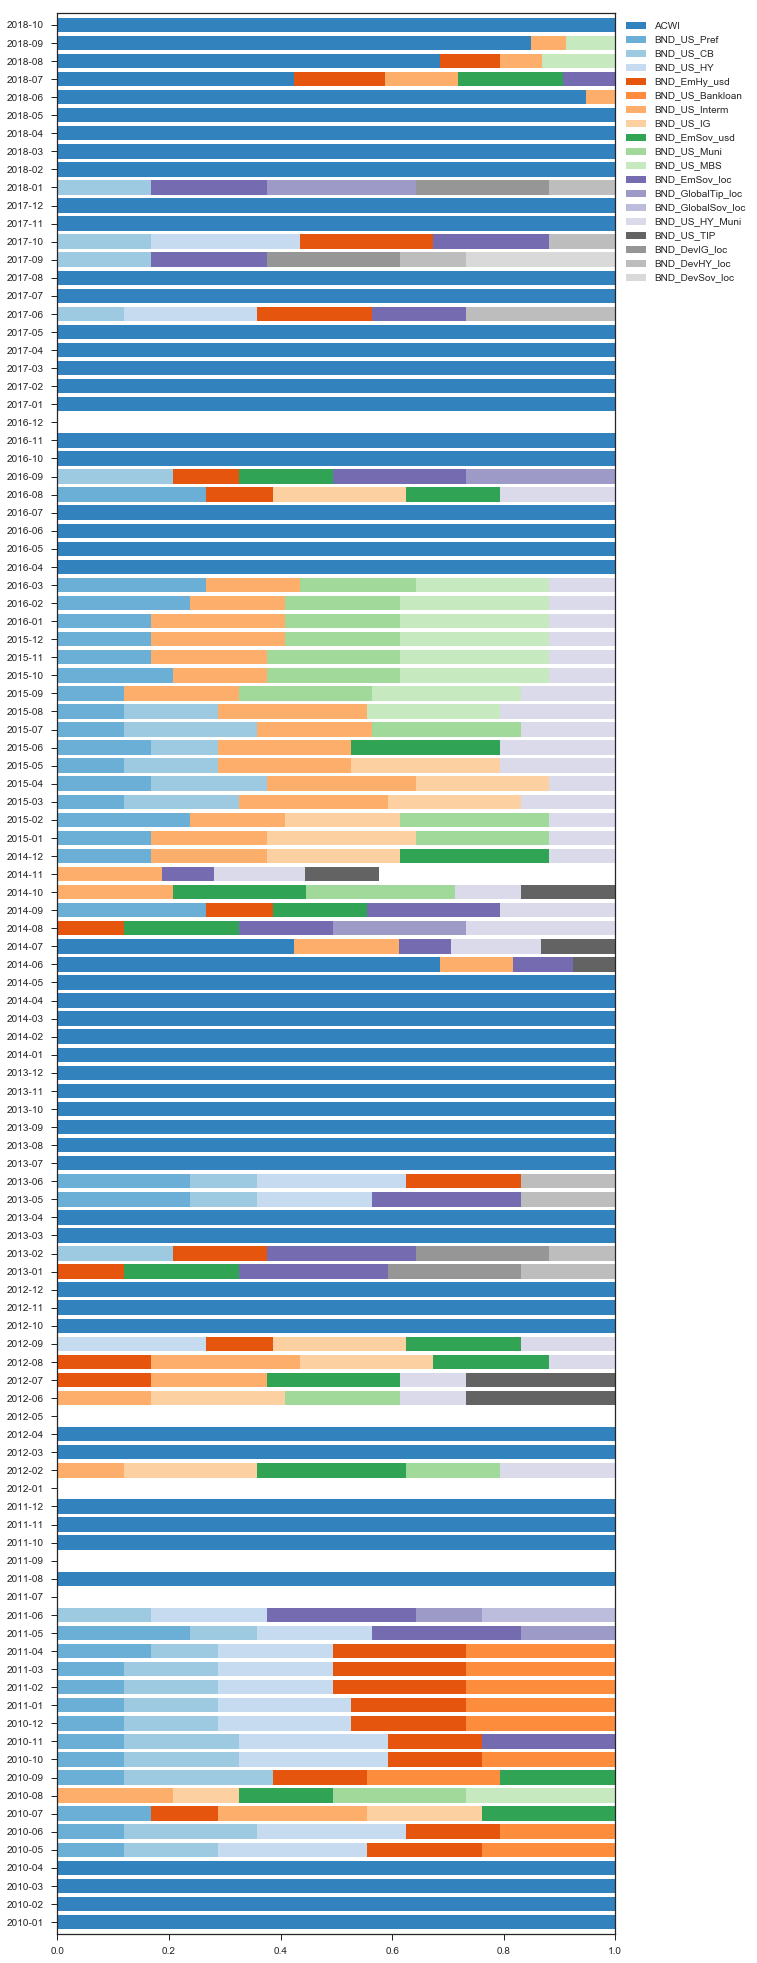

In [210]:
gbam.plot_weight([2010, 2018])

In [902]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Korea factor allocation model

In [903]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


6.052799940109253


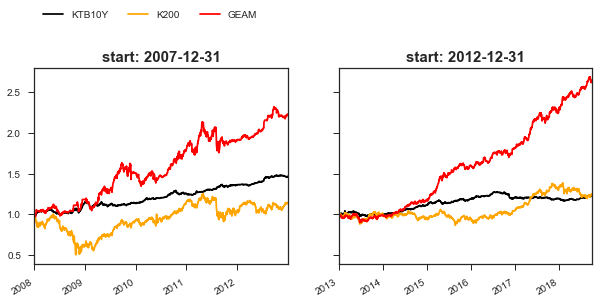

In [332]:
strats = ['KTB10Y', 'K200', 'DualMomentum']
names = ['KTB10Y', 'K200', 'GEAM']
color = ['k', 'orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

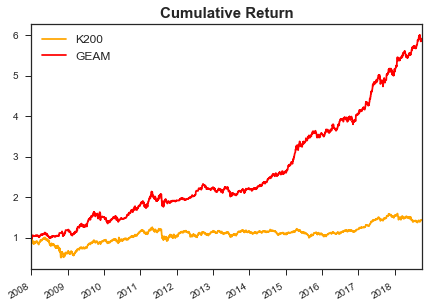

In [333]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)#, start='2009-12-31')

In [342]:
kfam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
LowVol_kr,1.67,2788,4.70,15.15,0.31,-42.49,6.80,12.22,0.56,0.20,26.39,56.25,1.08,75.80
Growth_kr,1.53,2788,3.87,18.51,0.21,-50.38,5.75,14.40,0.41,0.26,31.11,57.03,0.99,59.95
KTB10YL,2.55,2788,8.78,10.67,0.82,-18.34,11.99,8.82,1.22,-0.03,27.22,64.06,1.16,91.34
K200L,0.97,2788,-0.26,38.93,-0.01,-77.03,1.25,26.43,0.04,0.55,48.21,56.25,0.91,-74.70
DualMomentum,5.90,2788,17.27,12.84,1.34,-17.75,16.69,9.42,1.70,0.07,7.72,73.44,1.10,96.99


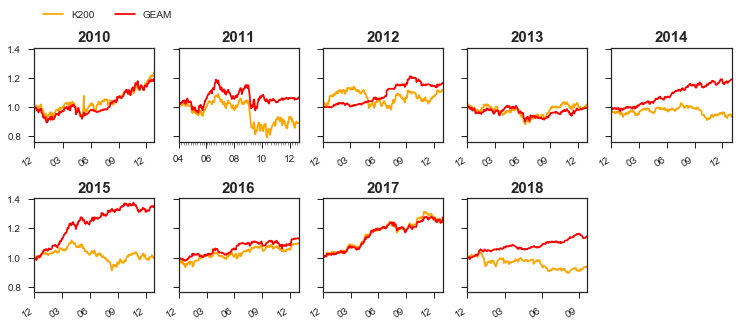

In [335]:
kfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2010))

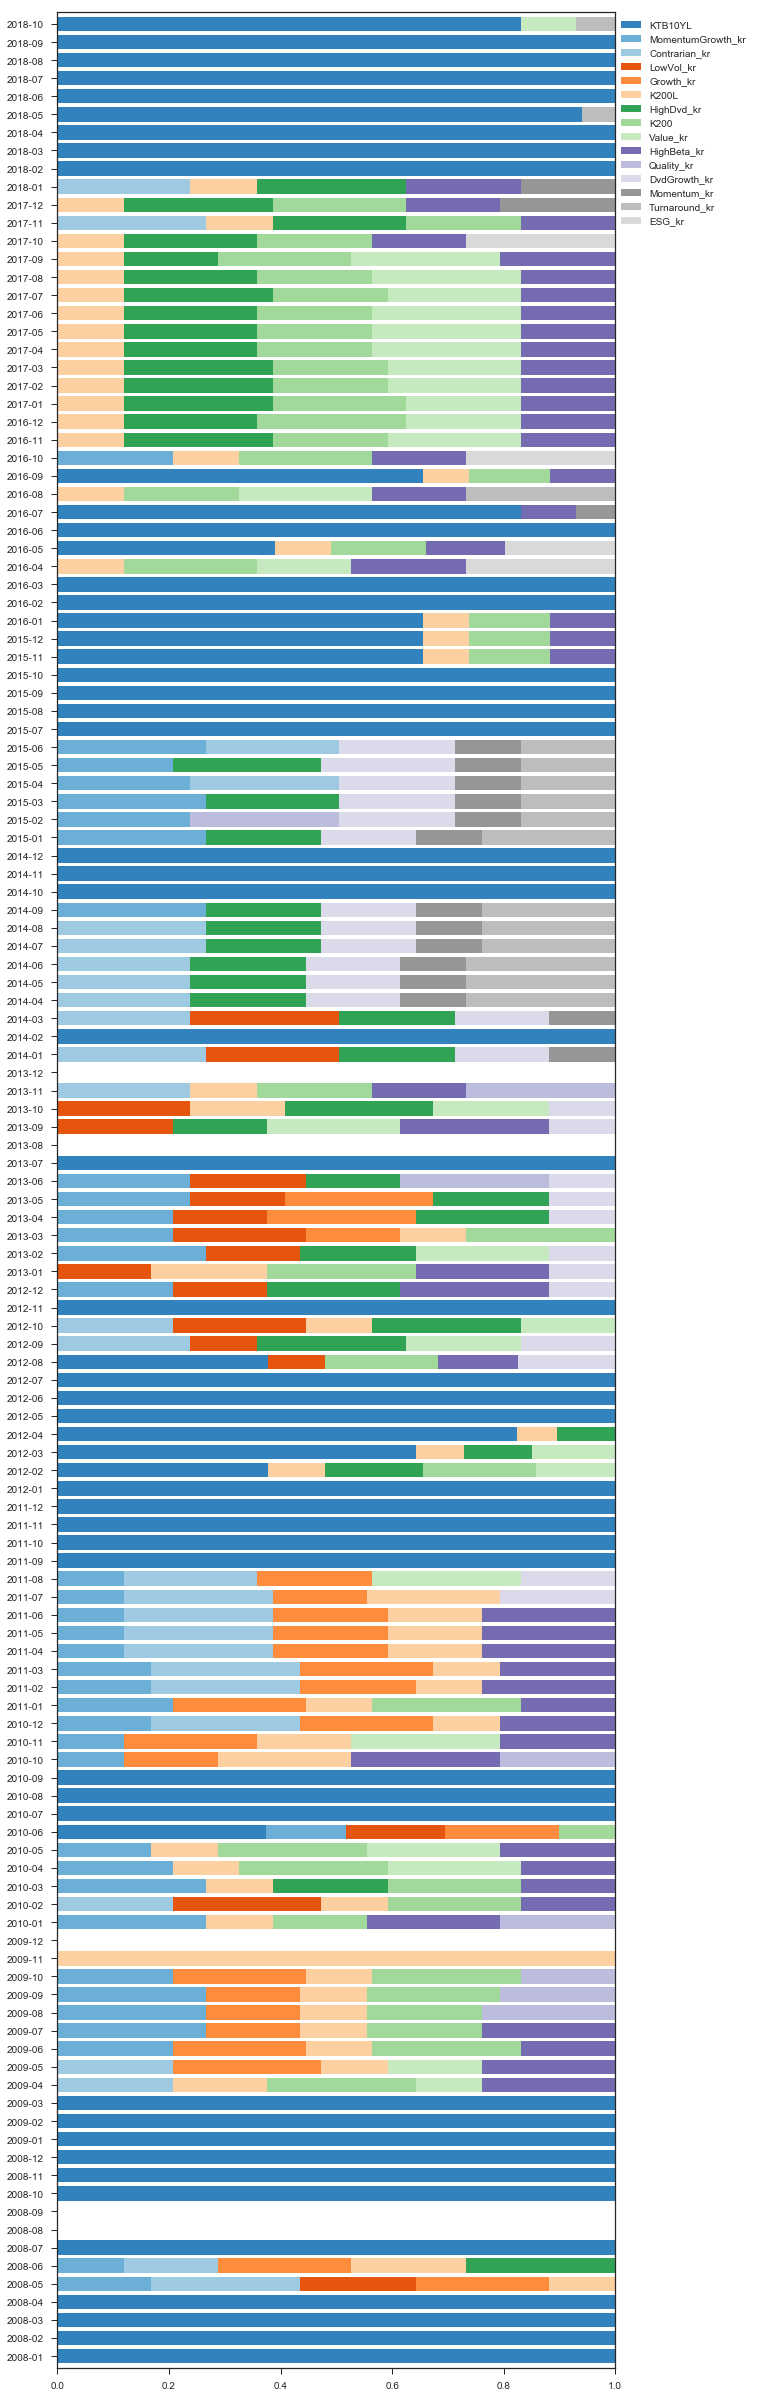

In [336]:
kfam.plot_weight([2003, 2018])

In [344]:
kfam.weight.iloc[-1]

Turnaround_kr        0.070298
HighDvd_kr           0.000000
DvdGrowth_kr         0.000000
Momentum_kr          0.000000
K200                 0.000000
ESG_kr               0.000000
Quality_kr           0.000000
MomentumGrowth_kr    0.000000
Value_kr             0.099416
Contrarian_kr        0.000000
KTB10Y               0.000000
HighBeta_kr          0.000000
LowVol_kr            0.000000
Growth_kr            0.000000
KTB10YL              0.830286
K200L                0.000000
Name: 2018-09-28 00:00:00, dtype: float64

# US multiasset model

In [988]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1003]:
umm = q.Backtester( 
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=10, 
    assets=setting.assets_us_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_HY', 
    supporter='BND_US_Long', 
    cash_equiv= 'BND_US_Tbill', 
    start='2007-12-31', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


8.441167116165161


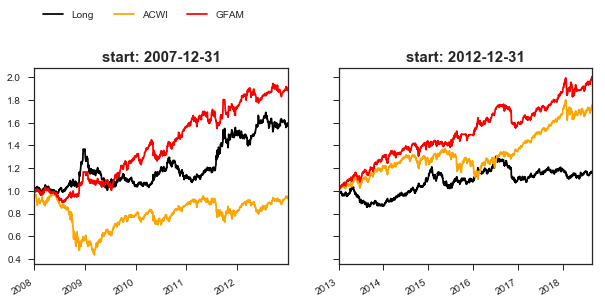

In [1004]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

umm.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

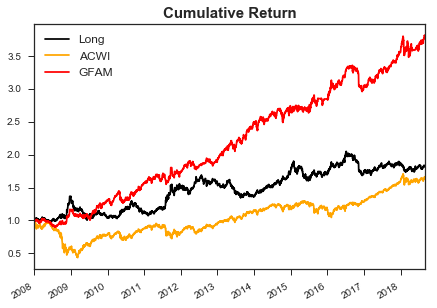

In [1005]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

umm.plot_cum(strats, names=names, color=color, logy=False)

In [1006]:
umm.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_Tbill,1.03,2688,0.30,0.57,0.53,-0.78,-0.02,0.26,-0.08,-0.00,55.27,54.33,2.45,-321.69
BND_US_Bankloan,1.54,2688,4.11,4.92,0.83,-32.43,3.49,3.30,1.60,0.07,17.22,63.78,1.01,77.00
LongShort,1.40,1004,8.75,9.78,0.89,-9.26,9.73,9.52,1.03,0.62,16.56,63.04,1.51,86.72
USD_UP,1.07,2688,0.64,8.68,0.07,-22.19,-0.46,8.30,-0.06,-0.15,52.81,49.61,1.11,1.66
DualMomentum,3.80,2688,13.23,12.64,1.05,-13.96,14.29,11.37,1.14,0.13,2.17,64.57,1.39,97.38


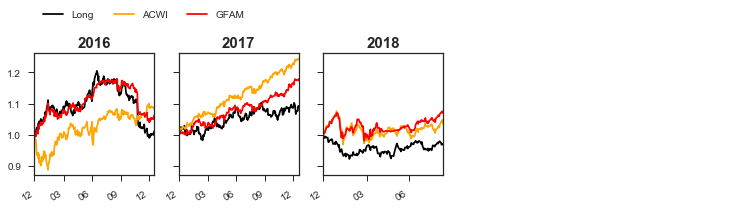

In [1007]:
umm.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

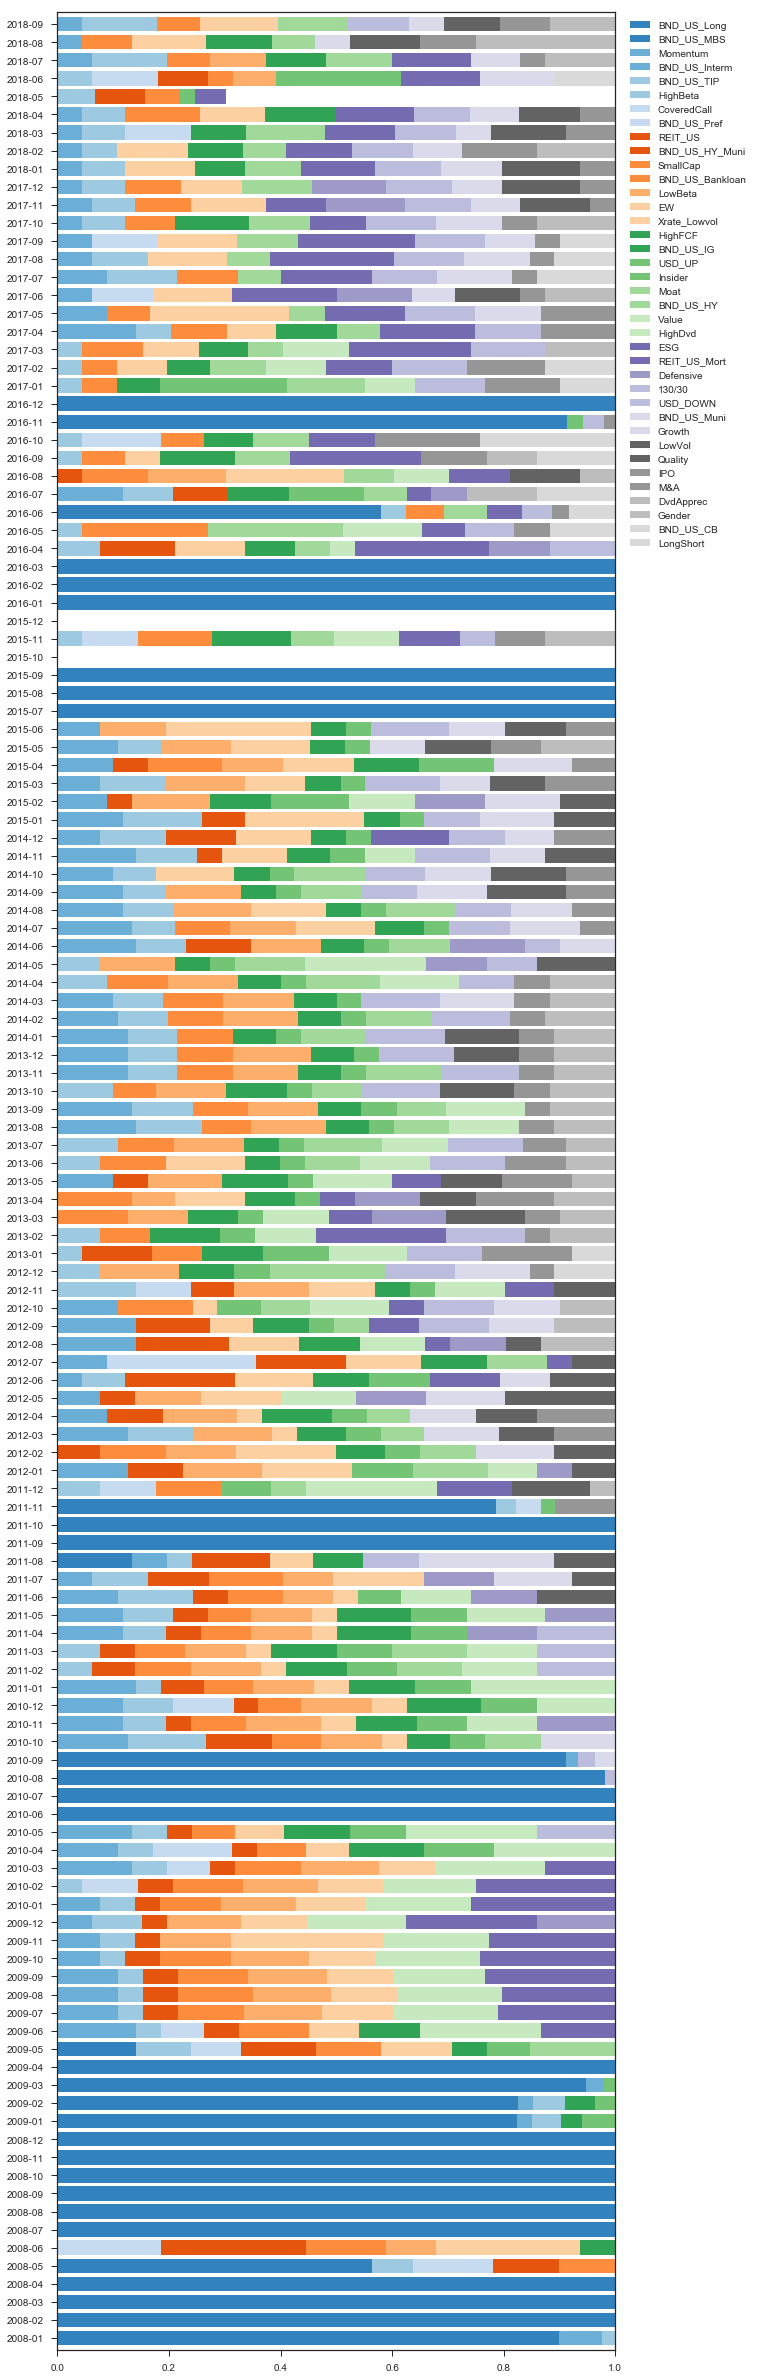

In [1008]:
umm.plot_weight([2003, 2018])

# Alternatives allocation model

In [1267]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1268]:
aam = q.Backtester( 
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_alt, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_TIP', 
    supporter='BND_US_Long', 
    cash_equiv= 'BND_US_Tbill', 
    start='2007-12-31', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


6.770400047302246


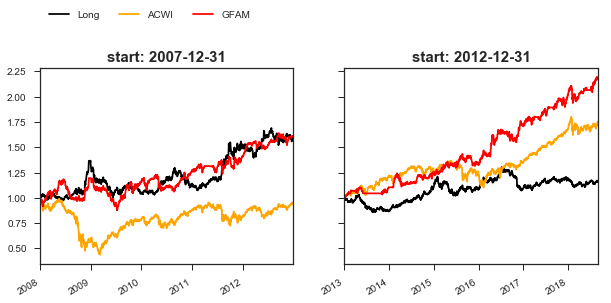

In [1271]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

aam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

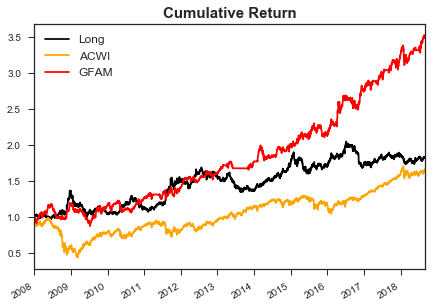

In [1272]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

aam.plot_cum(strats, names=names, color=color, logy=False)

In [1273]:
aam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Water,1.74,2688,5.29,22.12,0.24,-56.86,10.83,15.68,0.65,0.94,21.89,62.20,0.83,37.07
Comdty,0.56,2688,-5.26,19.66,-0.27,-74.02,-1.82,17.71,-0.11,0.50,56.17,46.46,1.02,56.44
MLP,1.71,2688,5.10,23.37,0.22,-53.06,8.06,15.07,0.62,0.63,32.39,59.06,0.96,49.03
Steel,0.68,2688,-3.56,41.78,-0.09,-82.14,3.46,32.88,0.12,1.66,47.07,48.82,1.12,-17.27
DualMomentum,3.49,2688,12.34,13.87,0.89,-26.54,13.25,13.08,1.10,0.16,3.77,59.84,1.43,95.04


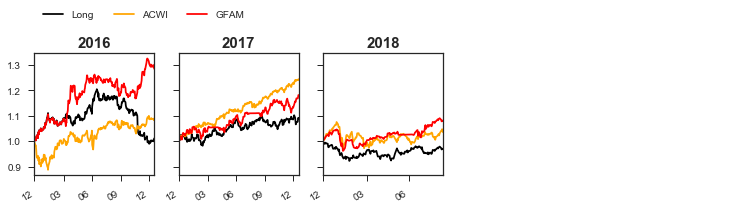

In [1274]:
aam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

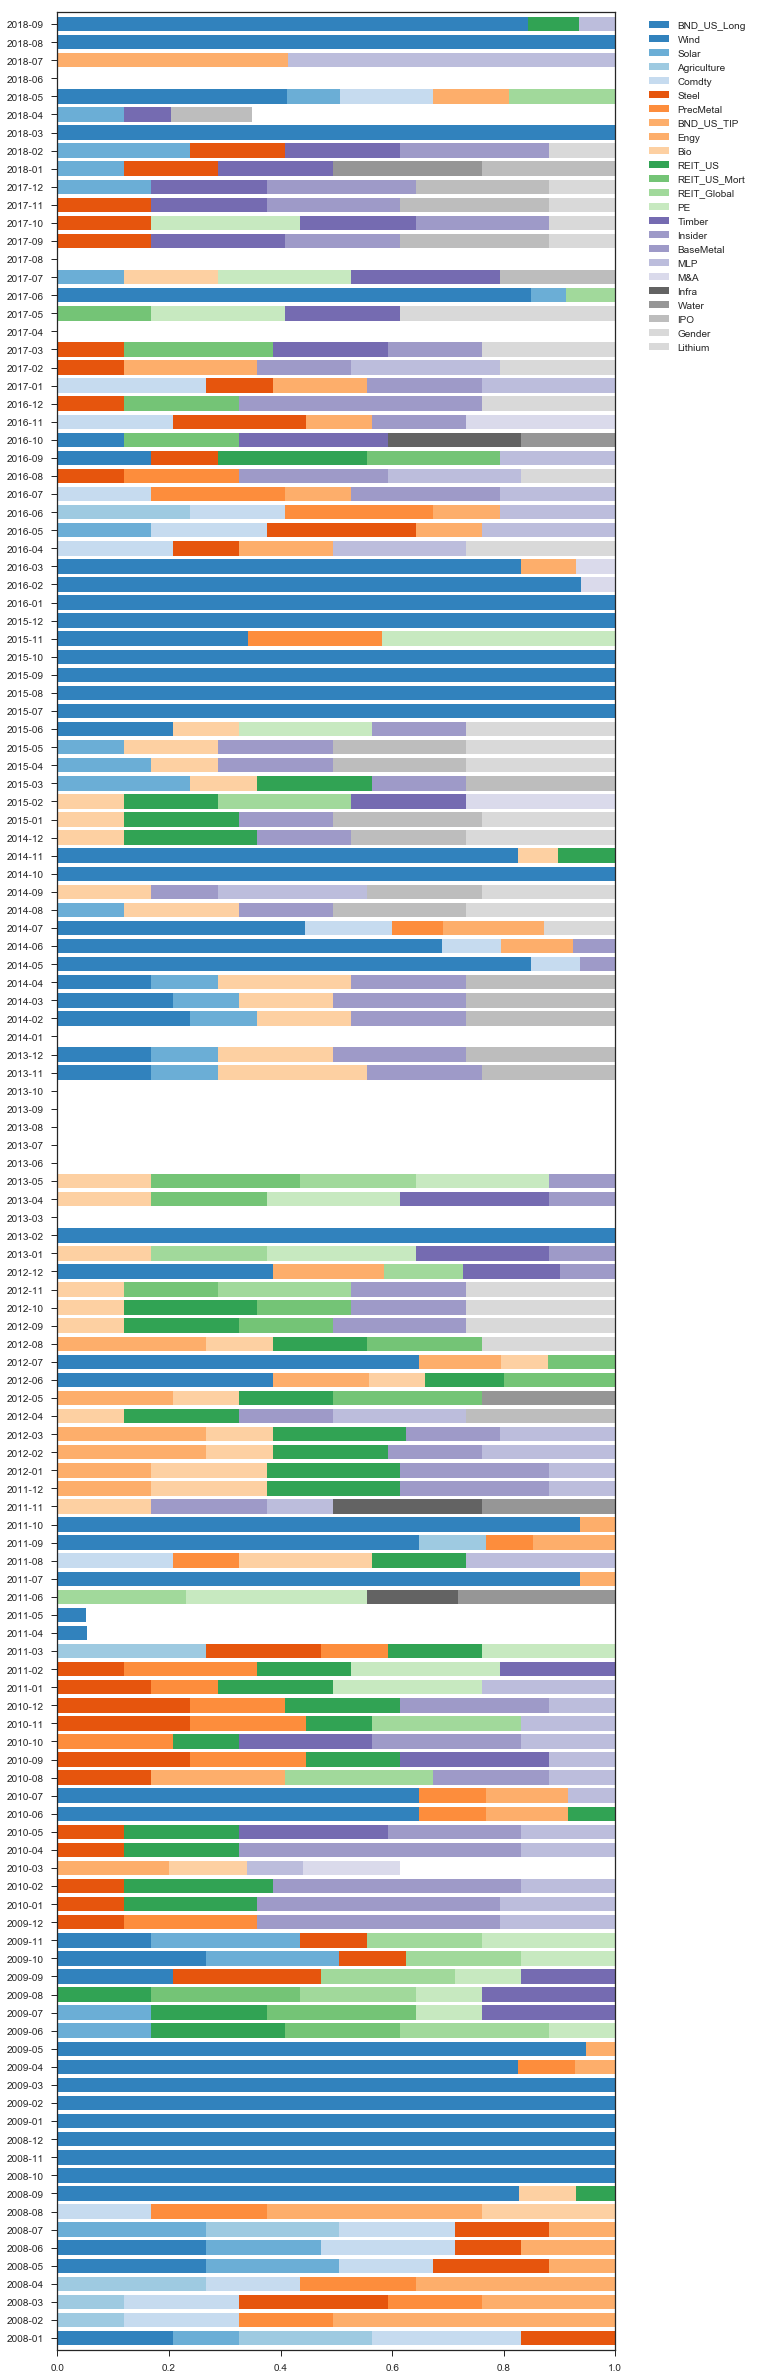

In [1275]:
aam.plot_weight([2003, 2018])

In [350]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [336]:
mix = q_base.BacktestComparator(setting.base_params(db), multiasset=multiasset, geam=geam, kfam=kfam, gsam=gsam, gfam=gfam)
mix.mix()

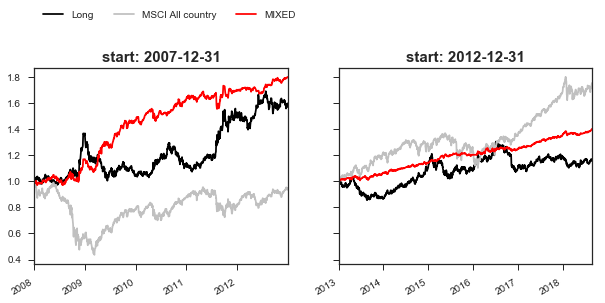

In [337]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

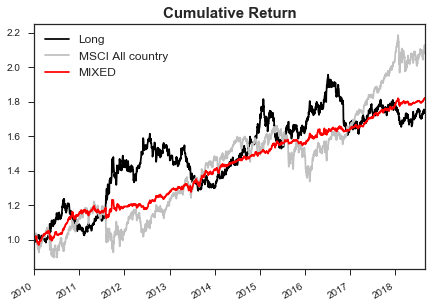

In [353]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False, start='2009-12-31')

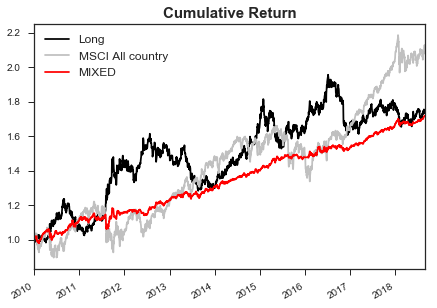

In [338]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False, start='2009-12-31')

In [334]:
mix.get_stats(start='2009-12-31').tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
geam,1.59,2183,5.45,9.02,0.60,-15.20,6.21,7.46,0.80,0.19,7.19,59.22,1.20,92.20
kfam,1.87,2183,7.46,4.44,1.68,-7.97,6.74,3.63,1.92,0.04,9.51,77.67,1.07,88.52
gsam,1.78,2183,6.83,8.45,0.81,-10.74,5.21,7.41,0.70,0.30,13.55,63.11,1.20,90.42
gfam,1.41,2183,3.99,3.81,1.05,-5.93,3.79,3.33,1.10,0.07,5.12,63.11,1.48,94.90
mixed,1.78,2183,6.80,5.32,1.28,-9.08,6.22,4.24,1.51,0.15,0.00,70.87,1.28,95.81


In [330]:
rt = mix.cum.mixed.resample('M').ffill().pct_change()#.plot.bar()
rt[rt<-0.05]

2009-01-31   -0.060275
Freq: M, Name: mixed, dtype: float64

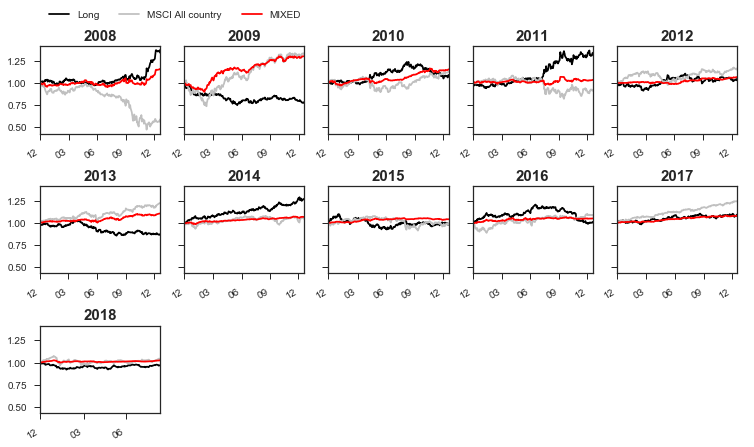

In [331]:
mix.plot_cum_yearly(strats, names=names, color=color)#, remove=range(2003,2013))